### Import Libraries


In [107]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import os

### Import dataset

In [121]:
dataset_not_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_not_processed/'
dataset_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed/'
dataset_file = 'pose_array.npy' 
dataset_array = np.load(dataset_not_processed_path + dataset_file)
dataset_array[:3]

array([[ 0.0000000e+00,  2.0877258e-06, -2.9983127e-09,  9.9999998e-03,
         0.0000000e+00,  0.0000000e+00,  4.5788047e-06,  1.0000000e+00],
       [ 1.0000000e+00,  2.0913014e-06, -2.9944740e-09,  9.9999998e-03,
         0.0000000e+00,  0.0000000e+00,  4.5875290e-06,  1.0000000e+00],
       [ 2.0000000e+00,  2.0944726e-06, -2.9910674e-09,  9.9999998e-03,
         0.0000000e+00,  0.0000000e+00,  4.5940719e-06,  1.0000000e+00]],
      dtype=float32)

### Filtering Dataset with Euclidean Distance and Orientation between Poses

In [136]:
# Initialize threshold for Euclidean distance and yaw angle
distance_threshold = 0.3
yaw_threshold_degree = 10  # in degrees
yaw_threshold_rad = np.radians(yaw_threshold_degree)

# Initialize array for storing IDs and poses
filtered_dataset = np.empty((0, dataset_array.shape[1]))
filtered_dataset = np.vstack((filtered_dataset, dataset_array[0]))

# Initialize index for query image
query_index = 0
query_yaw = dataset_array[query_index,-1]
query_XY = dataset_array[query_index,1:3]

# Compute Euclidean distance and check Yaw angle of query image with all the subsequent images
while query_index < len(dataset_array)-1:
    for i in range(query_index+1, len(dataset_array)):
        yaw_angle = dataset_array[i,-1]
        position_XY = dataset_array[i,1:3]
        euclidean_distance = np.linalg.norm(query_XY-position_XY)
        if euclidean_distance > distance_threshold or abs(yaw_angle - query_yaw) > yaw_threshold_rad:
            # If image with distance above threshold or yaw angle difference above threshold was found, save it
            filtered_dataset = np.vstack((filtered_dataset, dataset_array[i]))
            query_index = i
            query_XY = dataset_array[query_index,1:3]
            query_yaw = dataset_array[query_index,-1]
            break
    else:
        # If no image with distance above threshold or yaw angle difference above threshold was found, continue
        break

# Save array with dissimilar images
np.save(dataset_processed_path + 'filtered_dataset.npy', filtered_dataset)

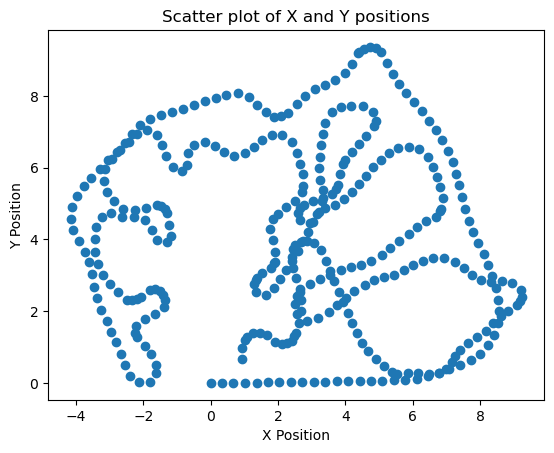

In [137]:
# Get the X and Y positions
X_positions = filtered_dataset[:, 1]
Y_positions = filtered_dataset[:, 2]

# Create a scatter plot of the X and Y positions
plt.scatter(X_positions, Y_positions)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Scatter plot of X and Y positions')
plt.show()

In [135]:
filtered_dataset[:3]

array([[2.50000000e+01, 3.32546443e-01, 1.18597341e-03, 9.99999978e-03,
        0.00000000e+00, 0.00000000e+00, 2.46704696e-03, 9.99996960e-01],
       [3.20000000e+01, 6.73775494e-01, 3.24973138e-03, 9.99999978e-03,
        0.00000000e+00, 0.00000000e+00, 3.54966987e-03, 9.99993682e-01],
       [3.90000000e+01, 1.01576531e+00, 5.99799398e-03, 9.99999978e-03,
        0.00000000e+00, 0.00000000e+00, 4.52968851e-03, 9.99989748e-01]])

In [139]:
import shutil
import os

# Load the filtered dataset
filtered_dataset = np.load(dataset_processed_path + 'filtered_dataset.npy')

# Define the base path for your images and the destination directory
image_base_path = dataset_not_processed_path
destination_dir = dataset_processed_path

# Iterate over the filtered dataset
for row in filtered_dataset:
    # Get the image ID and construct the file path
    image_id = row[0].astype(int)
    image_file = os.path.join(image_base_path, f'image_{image_id}.jpg')  # adjust the extension if needed

    # Construct the destination file path
    destination_file = os.path.join(destination_dir, f'{image_id}.jpg')

    # Copy the image to the destination directory
    shutil.copy(image_file, destination_file)

In [140]:
filtered_dataset.shape

(356, 8)

In [5]:
import os

# Specify the directory you want to use
directory = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed/'

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter the list to include only .jpg files
jpg_files = [file for file in files if file.endswith('.jpg')]

# Count the number of .jpg files
num_jpg_files = len(jpg_files)

print(f'{num_jpg_files} files found')

356 files found
